In [66]:
# Importing necassery libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading dataset
df_asels = pd.read_csv("ASELS Historical Data.csv")

In [5]:
# First 10 data in dataset
# Date object is Mounth/Day/Year
# As it can see from head and tail of dataset it includes year 2022 week days
df_asels.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,01/02/2023,63.75,63.00,64.65,62.80,50.23M,2.57%
1,12/30/2022,62.15,59.40,63.30,59.35,179.05M,5.70%
2,12/29/2022,58.80,58.40,59.60,57.90,63.54M,0.68%
3,12/28/2022,58.40,58.00,58.75,56.15,92.32M,0.78%
4,12/27/2022,57.95,59.25,59.65,57.75,62.77M,-2.11%
5,12/26/2022,59.20,58.80,60.15,58.60,78.15M,2.07%
6,12/23/2022,58.00,58.25,59.25,57.65,51.95M,-0.17%
7,12/22/2022,58.10,59.55,60.05,57.60,66.30M,-1.94%
8,12/21/2022,59.25,61.20,61.65,58.85,100.70M,-2.87%
9,12/20/2022,61.00,59.45,62.25,58.90,149.19M,2.61%


In [11]:
df_asels.tail(10)

,Date,Price,Open,High,Low,Vol.,Change %
243,01/14/2022,24.02,24.16,24.22,23.66,38.35M,-0.66%
244,01/13/2022,24.18,24.08,24.78,24.00,75.08M,0.58%
245,01/12/2022,24.04,24.26,24.40,23.88,35.52M,0.67%
246,01/11/2022,23.88,24.40,24.46,23.33,59.13M,-0.83%
247,01/10/2022,24.08,23.56,24.62,23.50,71.71M,3.15%
248,01/07/2022,23.34,23.34,23.56,22.83,32.30M,0.86%
249,01/06/2022,23.15,22.65,23.64,22.57,59.22M,1.04%
250,01/05/2022,22.91,22.41,22.99,22.01,44.95M,2.31%
251,01/04/2022,22.39,21.91,22.67,21.73,53.08M,3.21%
252,01/03/2022,21.69,20.88,21.69,20.74,30.53M,4.41%


In [10]:
# There are 253 data in dataset
# Percentiles are like below
df_asels.describe(percentiles=[0.1, 0.3, 0.7, 0.9])

,Price,Open,High,Low
count,253.000000,253.000000,253.000000,253.000000
mean,29.241383,29.218696,29.921265,28.671897
std,10.291744,10.186036,10.626356,9.945096
min,18.810000,19.010000,20.060000,18.810000
10%,21.818000,21.870000,22.170000,21.502000
30%,23.306000,23.404000,23.836000,23.050000
50%,24.440000,24.440000,24.860000,24.100000
70%,29.890000,29.838000,30.838000,29.084000
90%,46.968000,46.588000,48.148000,45.876000
max,63.750000,63.000000,64.650000,62.800000


In [7]:
# There are 7 feature in this dataset. 4 of them numeric 3 of them objects.
df_asels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      253 non-null    object 
 1   Price     253 non-null    float64
 2   Open      253 non-null    float64
 3   High      253 non-null    float64
 4   Low       253 non-null    float64
 5   Vol.      253 non-null    object 
 6   Change %  253 non-null    object 
dtypes: float64(4), object(3)
memory usage: 14.0+ KB


In [8]:
# As it can seen there is no missing datum.
df_asels.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [9]:
df_asels.shape[0]

253

<AxesSubplot:title={'center':'Boxplot'}, ylabel='Values'>

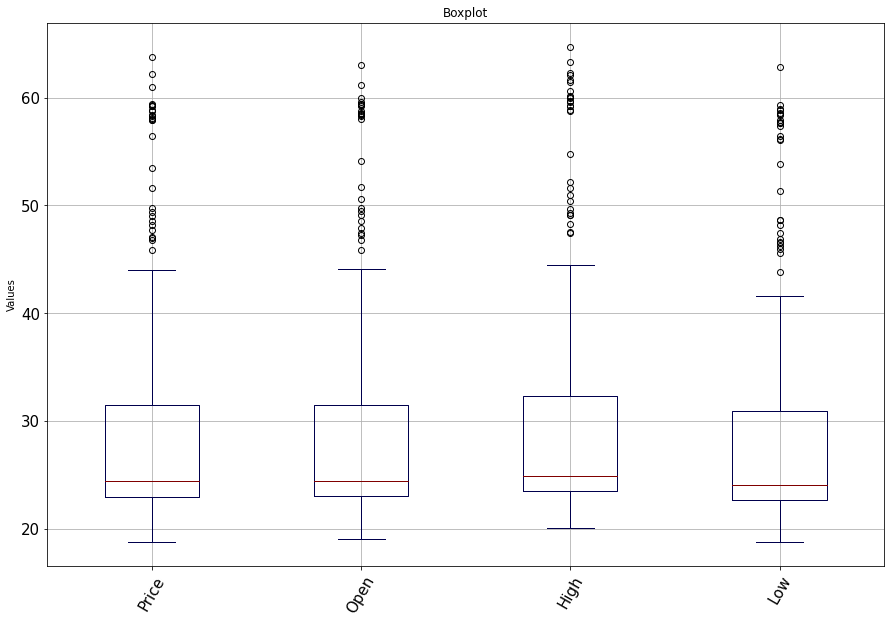

In [119]:
df_asels.plot(y=["Price", "Open", "High","Low"], kind="box", title="Boxplot", rot=60, xlabel="Features",ylabel="Values", figsize = [15,10], grid=True, fontsize=15, colormap="seismic")

Text(0, 0.5, 'Values')

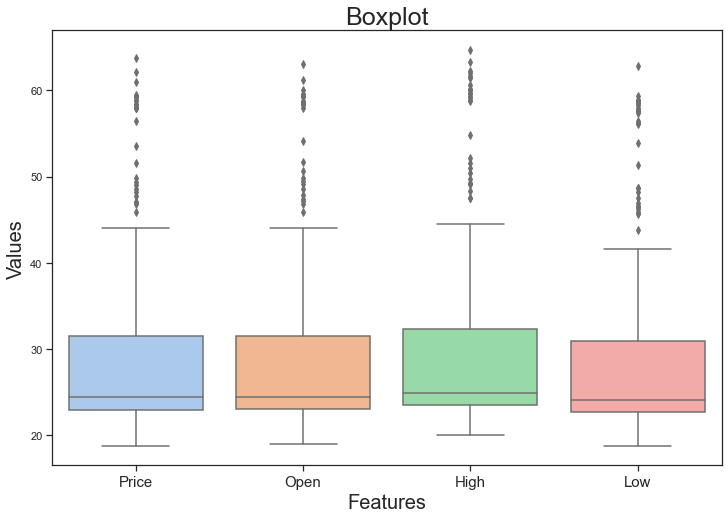

In [179]:
sns.set_theme(style="ticks", palette="pastel", rc={'figure.figsize':(12,8)})
boxplot = sns.boxplot(data=df_asels)
boxplot.set_title("Boxplot", fontsize=25)
boxplot.set_xticklabels(['Price', 'Open', 'High', 'Low'], fontsize=15)
boxplot.set_xlabel("Features",fontsize=20)
boxplot.set_ylabel("Values",fontsize=20)